In [ ]:
!pip install keras
!pip install tensorflow
!pip install --upgrade keras tensorflow
!pip install --upgrade opencv-python

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
import numpy as np

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Emotion detection/archive (3).zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/emotion extracted')
zip_ref.close()

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_data_gen.flow_from_directory(
	'/content/drive/MyDrive/emotion extracted/train',
	target_size=(48, 48),
	batch_size=64,
	color_mode="grayscale",
	class_mode='categorical')


Found 28709 images belonging to 7 classes.


In [ ]:
validation_generator = validation_data_gen.flow_from_directory(
		'/content/drive/MyDrive/emotion extracted/test',
		target_size=(48, 48),
		batch_size=64,
		color_mode="grayscale",
		class_mode='categorical')


Found 7178 images belonging to 7 classes.


In [ ]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
						input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

emotion_model.summary()

cv2.ocl.setUseOpenCL(False)

initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000,
							decay_rate=0.96)

optimizer = Adam(learning_rate=lr_schedule)

emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer,
					metrics=['accuracy'])


In [ ]:
emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=2500 // 64,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=800 // 64)


Epoch 1/30
39/39 [==============================] - 51s 1s/step - loss: 1.8529 - accuracy: 0.2312 - val_loss: 1.8212 - val_accuracy: 0.2721
Epoch 2/30
39/39 [==============================] - 51s 1s/step - loss: 1.8401 - accuracy: 0.2420 - val_loss: 1.8494 - val_accuracy: 0.2240
Epoch 3/30
39/39 [==============================] - 57s 1s/step - loss: 1.8139 - accuracy: 0.2484 - val_loss: 1.8217 - val_accuracy: 0.2604
Epoch 4/30
39/39 [==============================] - 46s 1s/step - loss: 1.8161 - accuracy: 0.2520 - val_loss: 1.8221 - val_accuracy: 0.2669
Epoch 5/30
39/39 [==============================] - 46s 1s/step - loss: 1.8274 - accuracy: 0.2324 - val_loss: 1.8390 - val_accuracy: 0.2370
Epoch 6/30
39/39 [==============================] - 48s 1s/step - loss: 1.8112 - accuracy: 0.2588 - val_loss: 1.8293 - val_accuracy: 0.2526
Epoch 7/30
39/39 [==============================] - 51s 1s/step - loss: 1.8147 - accuracy: 0.2436 - val_loss: 1.8080 - val_accuracy: 0.2565
Epoch 8/30
39/39 [==

In [ ]:
emotion_model.evaluate(validation_generator)

113/113 [==============================] - 57s 497ms/step - loss: 1.5170 - accuracy: 0.4182


[1.5169947147369385, 0.4182223379611969]

In [ ]:
accuracy = emotion_model_info.history['accuracy']
val_accuracy = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']


In [ ]:
import os

# Define the directory path
directory = '/content/drive/MyDrive/emotion extracted/emotion.h5'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)


In [ ]:
emotion_model_info.model.save('/content/drive/MyDrive/emotion_extracted/emotion_model.h5')


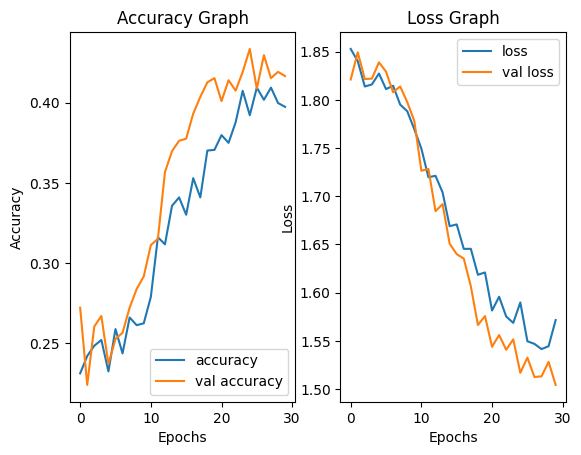

In [ ]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful",
				3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
